In [1]:
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.applications import InceptionResNetV2	
from tensorflow.keras.models import Model, Sequential
import numpy as np
from utils import *
import os
%matplotlib

Using matplotlib backend: agg


In [2]:
image_resize = (520, 704)
image_resize = (299, 299)
batch_size = 128
train_data_dir = "/content/drive/My Drive/train_reorganize/image"
root_path = "/content/drive/My Drive/"

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.01,
                                   rotation_range=10,
                                   validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    shuffle=True,
                                                    target_size=image_resize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    classes=('cort', 'shsy5y', 'astro'),
                                                    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
                                                        train_data_dir, # same directory as training data
                                                        shuffle=False,
                                                        target_size=image_resize,
                                                        class_mode='categorical',
                                                        color_mode='rgb',
                                                        classes=('cort', 'shsy5y', 'astro'),
                                                        subset='validation') # set as validation data

Found 2627 images belonging to 3 classes.
Found 655 images belonging to 3 classes.


In [15]:
keras.backend.clear_session()
resnet = InceptionResNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=image_resize + (3,))
model = Sequential()
model.add(resnet)
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 3)                 4611      
                                                                 
Total params: 54,347,491
Trainable params: 7,683
Non-trainable params: 54,339,808
_________________________________________________________________


In [5]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics = ['accuracy'])

In [6]:
history = TrainHistory()
history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 12).history)

Epoch 1/12
21/21 [==============================] - 1014s 49s/step - loss: 0.5249 - accuracy: 0.7929 - val_loss: 0.6839 - val_accuracy: 0.8748
Epoch 2/12
21/21 [==============================] - 70s 3s/step - loss: 0.1199 - accuracy: 0.9703 - val_loss: 0.5408 - val_accuracy: 0.9069
Epoch 3/12
21/21 [==============================] - 69s 3s/step - loss: 0.0967 - accuracy: 0.9749 - val_loss: 0.4656 - val_accuracy: 0.9374
Epoch 4/12
21/21 [==============================] - 69s 3s/step - loss: 0.0901 - accuracy: 0.9756 - val_loss: 0.4172 - val_accuracy: 0.9420
Epoch 5/12
21/21 [==============================] - 69s 3s/step - loss: 0.0732 - accuracy: 0.9836 - val_loss: 0.3618 - val_accuracy: 0.9634
Epoch 6/12
21/21 [==============================] - 70s 3s/step - loss: 0.0670 - accuracy: 0.9840 - val_loss: 0.3159 - val_accuracy: 0.9740
Epoch 7/12
21/21 [==============================] - 69s 3s/step - loss: 0.0631 - accuracy: 0.9848 - val_loss: 0.2754 - val_accuracy: 0.9679
Epoch 8/12
21/21 

In [7]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])

history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 3).history)

Epoch 1/3
21/21 [==============================] - 81s 3s/step - loss: 0.0425 - accuracy: 0.9852 - val_loss: 0.0961 - val_accuracy: 0.9878
Epoch 2/3
21/21 [==============================] - 69s 3s/step - loss: 0.0373 - accuracy: 0.9897 - val_loss: 0.0803 - val_accuracy: 0.9908
Epoch 3/3
21/21 [==============================] - 69s 3s/step - loss: 0.0453 - accuracy: 0.9848 - val_loss: 0.0755 - val_accuracy: 0.9847


In [8]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics = ['accuracy'])

history.add(model.fit(train_generator,validation_data = validation_generator, epochs = 3).history)

Epoch 1/3
21/21 [==============================] - 81s 3s/step - loss: 0.0379 - accuracy: 0.9890 - val_loss: 0.0656 - val_accuracy: 0.9863
Epoch 2/3
21/21 [==============================] - 69s 3s/step - loss: 0.0384 - accuracy: 0.9893 - val_loss: 0.0571 - val_accuracy: 0.9924
Epoch 3/3
21/21 [==============================] - 69s 3s/step - loss: 0.0394 - accuracy: 0.9890 - val_loss: 0.0531 - val_accuracy: 0.9863


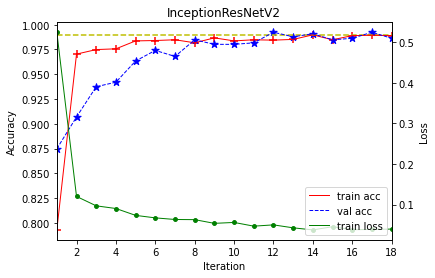

In [11]:
history.train_history_plot('InceptionResNetV2', 0.99)
history.to_file(os.path.join(root_path, 'InceptionResNetV2.txt'))

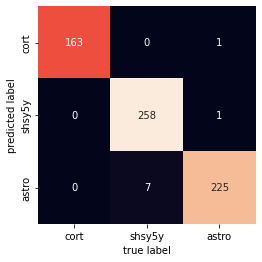

In [12]:
predict = model.predict(validation_generator)
predict_label = np.argmax(predict, axis=1)
true_label=validation_generator.labels

get_confusion_matrix(list(validation_generator.class_indices.keys()), true_label, predict_label)

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.01,
                                   rotation_range=10)

train_generator = train_datagen.flow_from_directory(
                                                    train_data_dir,
                                                    shuffle=True,
                                                    target_size=image_resize,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    color_mode='rgb',
                                                    classes=('cort', 'shsy5y', 'astro')) # set as training data

Found 3282 images belonging to 3 classes.


In [16]:
keras.backend.clear_session()
resnet = InceptionResNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=image_resize + (3,))
model = Sequential()
model.add(resnet)
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.layers[0].trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 1536)             54336736  
 onal)                                                           
                                                                 
 batch_normalization_203 (Ba  (None, 1536)             6144      
 tchNormalization)                                               
                                                                 
 dense (Dense)               (None, 3)                 4611      
                                                                 
Total params: 54,347,491
Trainable params: 7,683
Non-trainable params: 54,339,808
_________________________________________________________________


In [18]:
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=5e-4),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 12)
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 3)
model.compile(loss=categorical_crossentropy,
              optimizer=optimizers.Adam(learning_rate=1e-5),
              metrics = ['accuracy'])
model.fit(train_generator, epochs = 2)

Epoch 1/12
26/26 [==============================] - 79s 3s/step - loss: 0.3263 - accuracy: 0.8870
Epoch 2/12
26/26 [==============================] - 69s 3s/step - loss: 0.1014 - accuracy: 0.9707
Epoch 3/12
26/26 [==============================] - 69s 3s/step - loss: 0.0780 - accuracy: 0.9771
Epoch 4/12
26/26 [==============================] - 69s 3s/step - loss: 0.0665 - accuracy: 0.9823
Epoch 5/12
26/26 [==============================] - 69s 3s/step - loss: 0.0542 - accuracy: 0.9826
Epoch 6/12
26/26 [==============================] - 69s 3s/step - loss: 0.0590 - accuracy: 0.9826
Epoch 7/12
26/26 [==============================] - 70s 3s/step - loss: 0.0495 - accuracy: 0.9845
Epoch 8/12
26/26 [==============================] - 69s 3s/step - loss: 0.0457 - accuracy: 0.9851
Epoch 9/12
26/26 [==============================] - 69s 3s/step - loss: 0.0455 - accuracy: 0.9842
Epoch 10/12
26/26 [==============================] - 69s 3s/step - loss: 0.0443 - accuracy: 0.9884
Epoch 11/12
26/26 [

In [19]:
model.save_weights(os.path.join(root_path, 'InceptionResNetV2.h5'))

In [22]:
keras.backend.clear_session()
resnet = InceptionResNetV2(include_top=False, weights='imagenet', pooling='avg', input_shape=image_resize + (3,))
model = Sequential()
model.add(resnet)
model.add(layers.BatchNormalization())
model.add(layers.Dense(3, activation='softmax'))
model.layers[0].trainable = False

In [23]:
model.load_weights(os.path.join(root_path, 'InceptionResNetV2.h5'))